In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df=pd.read_csv('titanic.csv')

In [2]:
df['Fare'].isnull().sum()  # ko có phần tử null nên chỉ xét TH xử lý ngoại lệ 

0

# Outliers

In [3]:
def Outliers(choice,old_data):
    data=old_data.copy() # Tránh mất dữ liệu 
    if choice == 0: # Không xử lý ngoại lệ
        data[['Age','Fare']] 
    elif choice == 1: # Xử lý ngoại lệ 
        data.loc[data['Age'] > 73,'Age']=73
        data.loc[data['Fare']> 100,'Fare']=100
    new_data=data[['Age','Fare']] # dữ liệu trả về
    return new_data

# Draw

In [4]:
def Draw(new_data, name) :
    old_data = df.copy()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    old_data['Age'].plot(kind='kde', color='blue')
    new_data['Age'].plot(kind='kde', color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')
    plt.title(name + " Age")

# Missing Values

In [5]:
def MissingValues(choice , data):
    new_data = data.copy()  # Tránh mất dữ liệu 
    new_data2 = df.copy()
    if choice==0: #Mean
        mean=new_data['Age'].mean()
        new_data['Age'].fillna(mean,inplace=True)
        Draw(new_data,"Mean")       
        
    elif choice==1: #median
        median=new_data['Age'].median()
        new_data['Age'].fillna(median,inplace=True)        
        Draw(new_data,"Median")
       
    elif choice==2: #mode
        mode_imputation=statistics.mode(df['Age'])
        new_data['Age'].fillna(mode_imputation,inplace=True)
        Draw(new_data,"Mode")

    elif choice==3: #Random
        random_samples = new_data['Age'].dropna().sample(n = new_data['Age'].isnull().sum(),random_state=10)
        random_samples.index = new_data2[new_data2['Age'].isnull()].index
        new_data.loc[new_data['Age'].isnull(), 'Age'] = random_samples
        Draw(new_data,"Random")

    elif choice==4: #Tail
        extreme = new_data.Age.mean() + 3*new_data.Age.std()  # trung bình + phân bố chuẩn 
        new_data['Age'].fillna(extreme,inplace=True)
        Draw(new_data,"Tail")
        
    elif choice==5: # Random bat ki
        
        random=np.random.uniform(data.Age.min(), data.Age.max())
        random=round(random, 1)    
        print(random)
        new_data['Age'].fillna(random,inplace=True)
        Draw(new_data,"Arbitrary")
        
    elif choice==6: # New Features
        new_data['Age_NAN']=np.where(df['Age'].isnull(),1,0)
        new_data['Age'].fillna(df['Age'].median(),inplace=True)
        Draw(new_data,"New Features")
    plt.show()
    return new_data

# Predict 

In [6]:
def Predict_Score(new_data):
    list_accuracy_score = []
    for i in range (10):
        X_train,X_test,y_train,y_test=train_test_split(new_data, df['Survived'], 
                                                       test_size=0.3, random_state=i)
        classifier=LogisticRegression()
        classifier.fit(X_train,y_train)
        y_pred=classifier.predict(X_test)
        list_accuracy_score.append(accuracy_score(y_test,y_pred))
    return np.mean(list_accuracy_score)

# Main

## OUTLIERS THEN MISSING VALUES

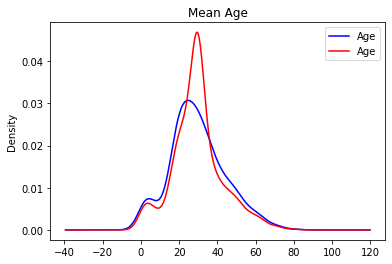

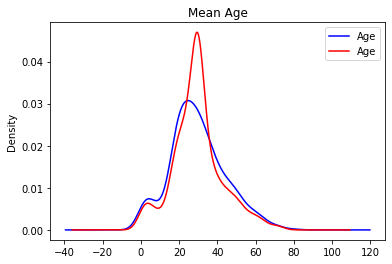

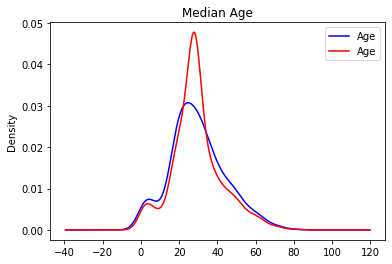

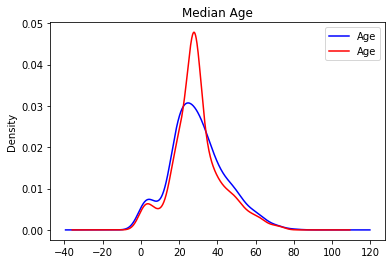

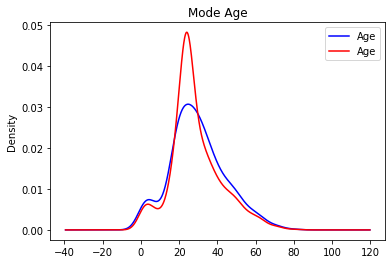

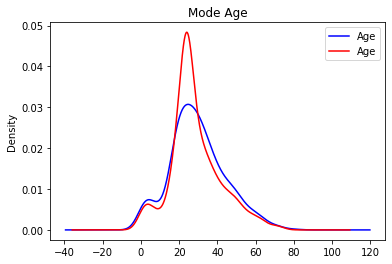

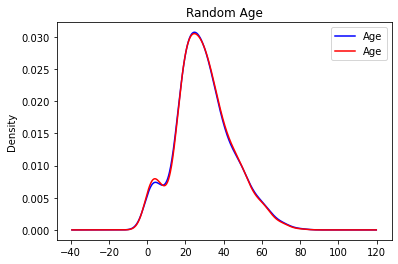

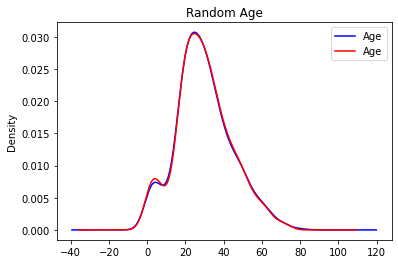

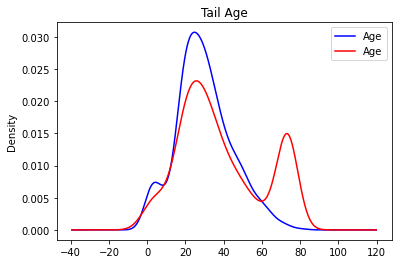

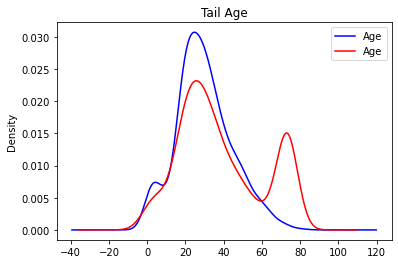

14.8


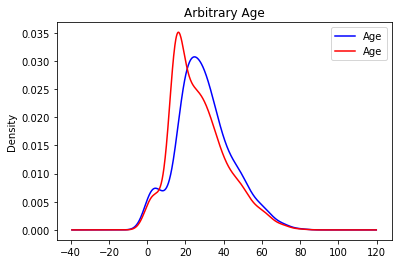

20.9


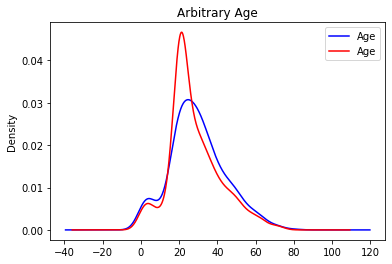

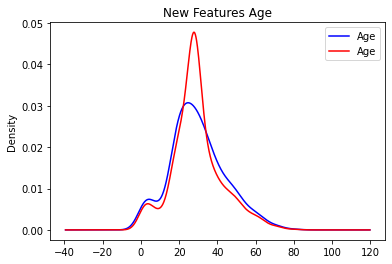

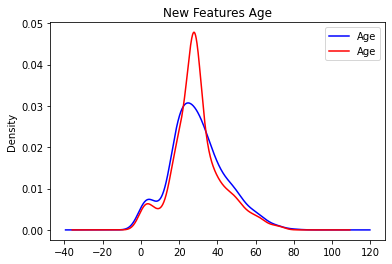

In [7]:
Table={'Type':['Mean','Median','Mode','Random Values','Tail Values','Arbitrary Values','New Features'],
                      'Not Outliers':np.zeros((7,),dtype=float),
                      'Outliers':np.zeros((7,),dtype=float)}

Table=pd.DataFrame(Table)

for i in range (7):
    for j in range(2):
        temp = Outliers(j,df.copy())
        temp = MissingValues(i,temp)
        Table.iloc[i,j+1] = Predict_Score(temp)

In [8]:
Table

,Type,Not Outliers,Outliers
0,Mean,0.652985,0.667164
1,Median,0.653358,0.666791
2,Mode,0.653358,0.666045
3,Random Values,0.652985,0.665299
4,Tail Values,0.663806,0.667164
5,Arbitrary Values,0.657463,0.667164
6,New Features,0.660075,0.663433


## MISSING VALUES THEN OUTLIERS

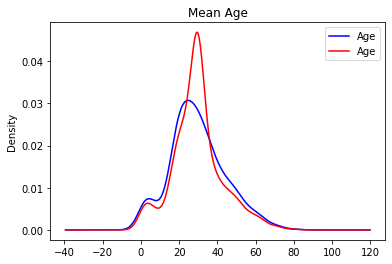

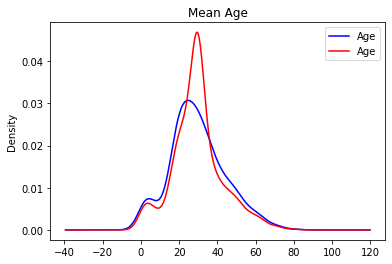

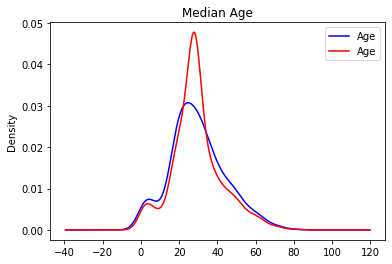

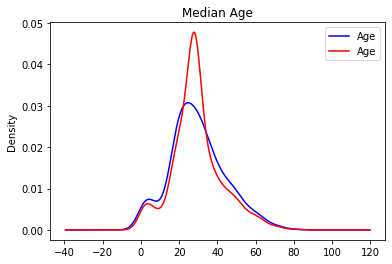

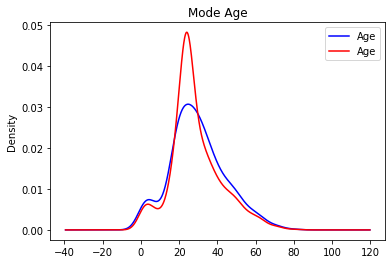

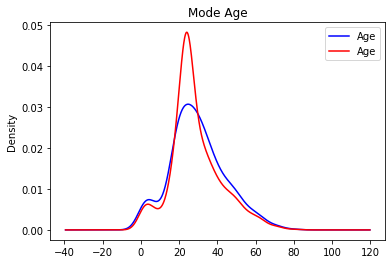

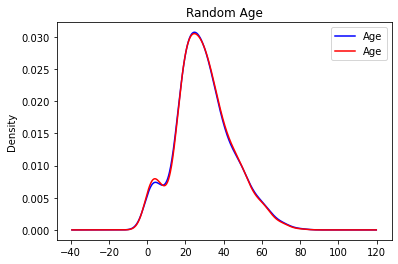

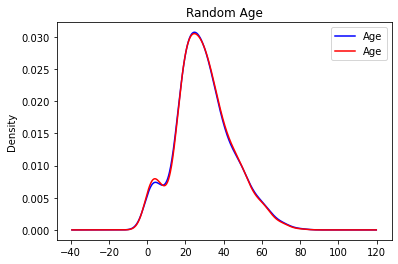

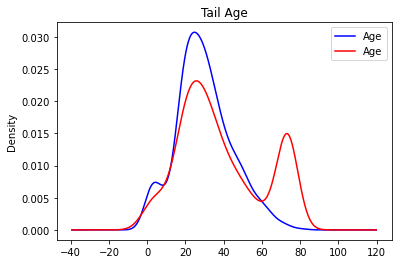

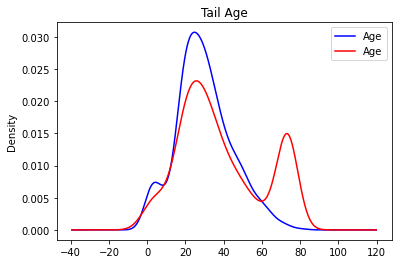

40.5


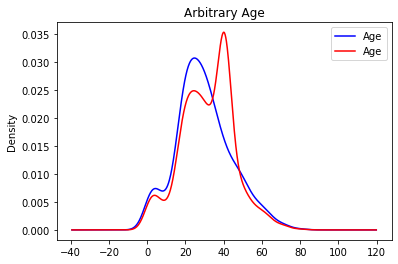

18.5


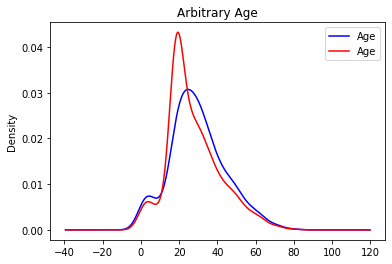

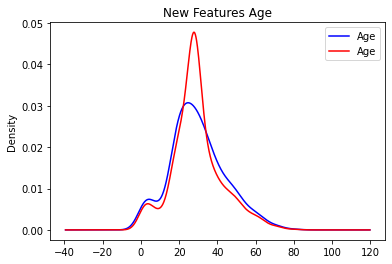

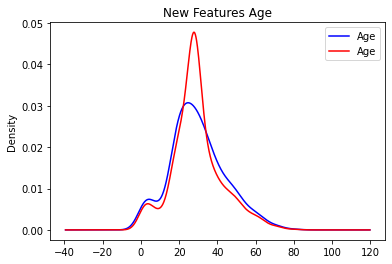

In [9]:
for i in range (7):
    for j in range(2):
        temp=MissingValues(i,df.copy())
        temp=Outliers(j,temp)
        Table.iloc[i,j+1]=Predict_Score(temp)

In [10]:
Table

,Type,Not Outliers,Outliers
0,Mean,0.652985,0.667164
1,Median,0.653358,0.666791
2,Mode,0.653358,0.666045
3,Random Values,0.652985,0.665299
4,Tail Values,0.663806,0.667164
5,Arbitrary Values,0.657090,0.668284
6,New Features,0.653358,0.666791


### Nhận xét : 


Dựa vào đồ thị được vẽ thì ta thấy Phương pháp Random cho ra giá trị có độ tương ứng với dữ liệu đã cho trước đó và không thay đổi nhiều.

Dựa theo bảng giá trị thì ta thấy Mean cho ra kết quả tốt nhất. 

Ở đây dữ liệu ngoại lệ thì nó thường làm sai lệch giá trị mean do đó nếu không sử dụng sai lệch thì mean cho ra kết quả tốt hơn so với median.